# Team assignment - Boston

## 1 Data collection and preparation

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Bike rentals

Read data on bike rentals:

In [8]:
bike = pd.read_csv("boston_2016.csv")

In [9]:
#for later use
#bike15 = pd.read_csv("boston_2015.csv")
#bike17 = pd.read_csv("boston_2017.csv")
#bike18 = pd.read_csv("boston_2018.csv")
#bike19 = pd.read_csv("boston_2019.csv")

In [10]:
bike.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type'],
      dtype='object')

In [11]:
bike.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


Number of entries (1236203) = Non-Null count for all colums, meaning we are not missing any values.

**Cleaning the datset:**

In [13]:
bike.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1236198,False,False,False,False,False,False,False,False
1236199,False,False,False,False,False,False,False,False
1236200,False,False,False,False,False,False,False,False
1236201,False,False,False,False,False,False,False,False


In [14]:
#transforming Dtype of start_time/end_time from object to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [15]:
# Creates column that provides the duration of the rental period
bike['trip_duration'] = bike['end_time']-bike['start_time']
bike.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,00:15:41


**Elimination**

In [16]:
# Dropping entries with negative trip duration
bike = bike[bike['trip_duration'] >= pd.Timedelta(0)]
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236200 entries, 0 to 1236202
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236200 non-null  datetime64[ns] 
 1   end_time            1236200 non-null  datetime64[ns] 
 2   start_station_id    1236200 non-null  int64          
 3   end_station_id      1236200 non-null  int64          
 4   start_station_name  1236200 non-null  object         
 5   end_station_name    1236200 non-null  object         
 6   bike_id             1236200 non-null  int64          
 7   user_type           1236200 non-null  object         
 8   trip_duration       1236200 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 94.3+ MB


In [17]:
bike["weekday"] = bike["start_time"].dt.dayofweek
bike.head(60000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,weekday
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,00:32:19,4
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,00:32:08,4
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,00:30:14,4
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,00:29:49,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,00:15:41,4
...,...,...,...,...,...,...,...,...,...,...
59995,2016-03-28 16:30:21,2016-03-28 16:32:40,91,80,One Kendall Square at Hampshire St / Portland St,MIT Stata Center at Vassar St / Main St,769,Customer,00:02:19,0
59996,2016-03-28 16:31:49,2016-03-28 16:36:49,108,115,Harvard University / SEAS Cruft-Pierce Halls a...,Porter Square Station,1109,Subscriber,00:05:00,0
59997,2016-03-28 16:32:14,2016-03-28 16:40:06,189,88,Kendall T,Inman Square at Vellucci Plaza / Hampshire St,1051,Subscriber,00:07:52,0
59998,2016-03-28 16:32:28,2016-03-28 16:42:43,22,38,South Station - 700 Atlantic Ave.,TD Garden - Causeway at Portal Park #2,1081,Subscriber,00:10:15,0


### Weather

Read weather data:

In [18]:
weatherhour = pd.read_csv("weather_hourly_boston.csv")

In [19]:
weatherhour.columns

Index(['date_time', 'max_temp', 'min_temp', 'precip'], dtype='object')

In [20]:
weatherhour.head(3)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0


In [21]:
weatherhour.describe()

,max_temp,min_temp,precip
count,43354.000000,43354.000000,43356.000000
mean,11.456717,11.395922,0.095581
std,10.118606,10.114095,0.294019
min,-22.800000,-22.800000,0.000000
25%,3.300000,3.300000,0.000000
50%,11.700000,11.700000,0.000000
75%,20.000000,19.850000,0.000000
max,36.100000,36.100000,1.000000


In [22]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


Number of entries (43848) != Non-Null count for all colums, meaning we are (!) missing values.

In [23]:
#transforming Dtype of date_time from object to datetime
weatherhour['date_time'] = pd.to_datetime(weatherhour['date_time'])
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


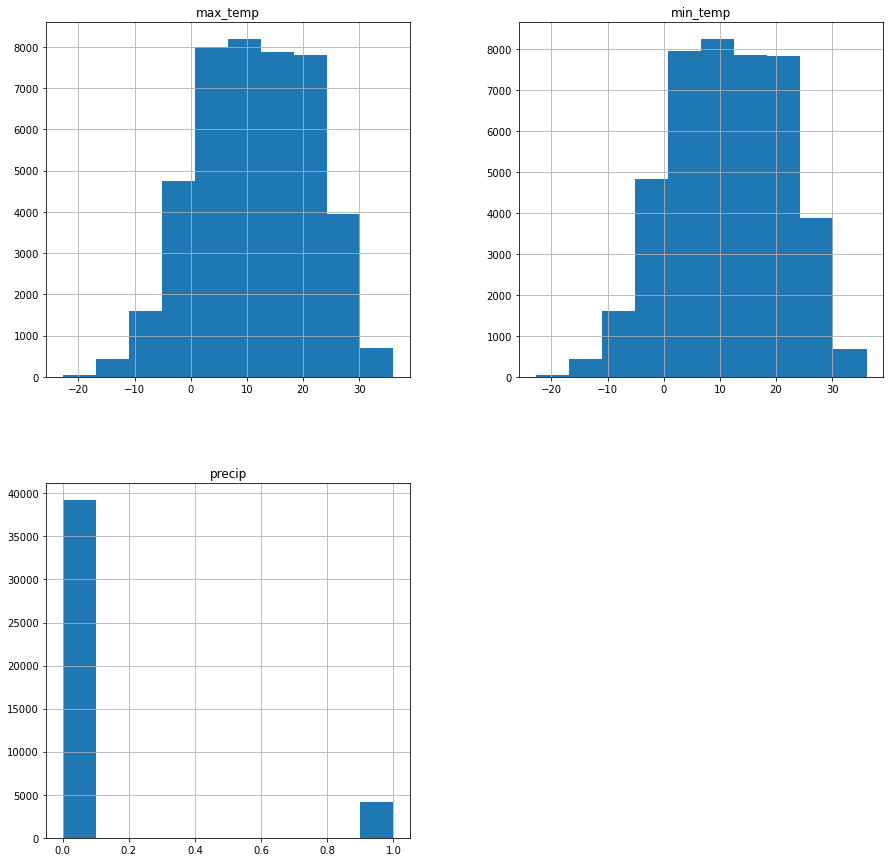

In [24]:
# Histogram of all numeric fields
weatherhour_hist = weatherhour.drop(columns=['date_time'],axis=1)
weatherhour_hist.hist(figsize=(15,15));

**Cleaning the datset:**

In [25]:
weatherhour.isnull()

,date_time,max_temp,min_temp,precip
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
43843,False,False,False,False
43844,False,False,False,False
43845,False,False,False,False
43846,False,False,False,False


In [26]:
#display entries with NaN values
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip
98,NaT,NaN,NaN,NaN
145,NaT,NaN,NaN,NaN
304,NaT,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN
588,NaT,NaN,NaN,NaN
...,...,...,...,...
43019,NaT,NaN,NaN,NaN
43428,NaT,NaN,NaN,NaN
43570,NaT,NaN,NaN,NaN
43594,NaT,NaN,NaN,NaN


Mostly, for given entries values are missing for all attributes.

**Elimination**

In [27]:
# Dropping rows with missing values.
weatherhour.dropna(axis=0, inplace=True)
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip


In [28]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43354 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [29]:
# Dropping duplicates (date_time)
# Only date_time is faulty, dropping duplicates leads to less data! 
# We should fix this by just manipulating the entries in the date_time column.
weatherhour.drop_duplicates(subset='date_time', keep='first', inplace=True, ignore_index=False)
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40889 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


**Imputation** <br>
To maintain the completeness of the time series dataset, we have decided to impute missing values.

In [30]:
# Extending the dataframe with missing time stamps
# Set the index to the datetime column
weatherhour.index = pd.to_datetime(weatherhour['date_time'])

# Generate a sequence of hourly dates between the start and end dates of the data
dates = pd.date_range(start=weatherhour.index.min(), end=weatherhour.index.max(), freq='H')

# Reindex the dataframe with the new dates
weatherhour = weatherhour.reindex(dates)

weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-01-01 06:00:00 to 2020-01-02 05:00:00
Freq: H
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [31]:
weatherhour.head()

,date_time,max_temp,min_temp,precip
2015-01-01 06:00:00,2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [32]:
# Deletes date_time column as it is now our index
weatherhour.drop('date_time', axis=1, inplace=True)

In [33]:
weatherhour.head()

,max_temp,min_temp,precip
2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0


In [34]:
# Imputing missing values by means of interpolation
weatherhour['interp_maxtemp']  = weatherhour['max_temp'].interpolate()   # mean of prev/next
weatherhour['interp_mintemp']  = weatherhour['min_temp'].interpolate()   # mean of prev/next
weatherhour['interp_precip']  = weatherhour['precip'].interpolate()   # mean of prev/next
weatherhour['update_maxtemp'] = weatherhour['interp_maxtemp']
weatherhour['update_maxtemp'].update( weatherhour['max_temp'] )  # note: this is an inplace operation
weatherhour['update_mintemp'] = weatherhour['interp_mintemp']
weatherhour['update_mintemp'].update( weatherhour['min_temp'] )  # note: this is an inplace operation
weatherhour['update_precip'] = weatherhour['interp_precip']
weatherhour['update_precip'].update( weatherhour['precip'] )  # note: this is an inplace operation
weatherhour.head(98)

,max_temp,min_temp,precip,interp_maxtemp,interp_mintemp,interp_precip,update_maxtemp,update_mintemp,update_precip
2015-01-01 06:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0,-4.40,-4.40,0.0,-4.40,-4.40,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
...,...,...,...,...,...,...,...,...,...
2015-01-05 03:00:00,NaN,NaN,NaN,10.85,10.60,1.0,10.85,10.60,1.0
2015-01-05 04:00:00,10.6,10.6,1.0,10.60,10.60,1.0,10.60,10.60,1.0
2015-01-05 05:00:00,10.0,10.0,0.0,10.00,10.00,0.0,10.00,10.00,0.0
2015-01-05 06:00:00,NaN,NaN,NaN,8.35,8.35,0.0,8.35,8.35,0.0


### Stations

In [35]:
stations = pd.read_csv("current_bluebikes_stations.csv")
stations.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0


In [36]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           448 non-null    object 
 1   Name             448 non-null    object 
 2   Latitude         448 non-null    float64
 3   Longitude        448 non-null    float64
 4   District         444 non-null    object 
 5   Public           448 non-null    object 
 6   Total docks      448 non-null    int64  
 7   Deployment Year  443 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.1+ KB


In [37]:
NaN_for_attribute2 = stations[stations["Deployment Year"].isna()]
NaN_for_attribute2

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.383227,-71.106069,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.352576,-71.067644,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.369036,-71.086310,NaN,Yes,19,NaN
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


## 2 Descriptive Analytics

### KPIs - Fleet operation

Total number of rentals per day:

Text(0, 0.5, 'Total number of rentals per day')

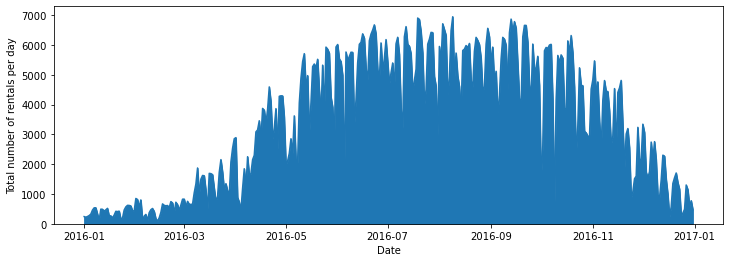

In [38]:
bikeplot = bike.groupby(bike["start_time"].rename('Date').dt.date).size()

fig, axs = plt.subplots(figsize=(12, 4))
bikeplot.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per day')

Total number of rentals per hour:

Text(0, 0.5, 'Total number of rentals per hour')

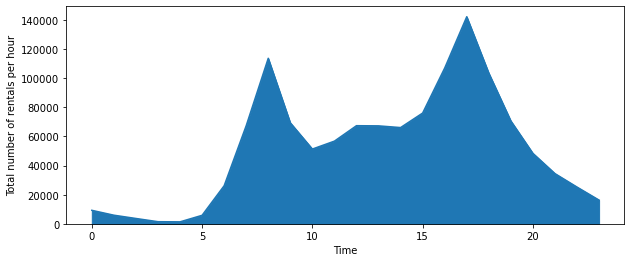

In [39]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Time').dt.hour).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per hour')

Text(0, 0.5, 'Total number of rentals per month')

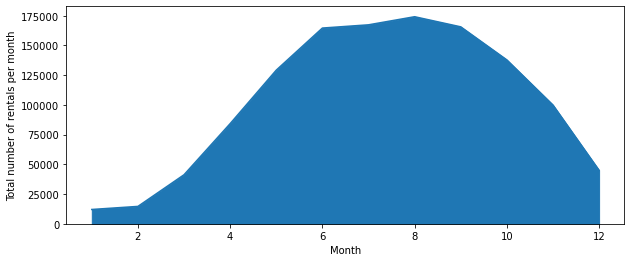

In [40]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Month').dt.month).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per month')

Average usage time...

In [41]:
# Merging bike and staion datasets
stations.rename(columns={'Name': 'start_station_name'}, inplace=True)
bike_station = pd.merge(bike, stations, on='start_station_name')

... based on time of day:

In [42]:
bike_station.groupby(bike_station['start_time'].dt.hour)['trip_duration'].mean()

DataError: No numeric types to aggregate

... based on user type:

In [43]:
bike_station.groupby('user_type')['trip_duration'].mean()

DataError: No numeric types to aggregate

... based on start station:

In [44]:
bike_station.groupby('start_station_name')['trip_duration'].mean()

DataError: No numeric types to aggregate

... based on district:

In [45]:
bike_station.groupby('District')['trip_duration'].mean()

DataError: No numeric types to aggregate

Total duration of usage time per bike:

In [46]:
time_in_use = bike_station.groupby('bike_id')['trip_duration'].sum().reset_index()
time_in_use.sort_values('trip_duration', ascending=False)

,bike_id,trip_duration
990,1053,349 days 06:25:10.621000
360,390,169 days 21:38:34.975000
1051,1116,128 days 08:48:44.094000
53,56,92 days 21:10:45.448000
1,2,90 days 18:45:03.191000
...,...,...
522,563,0 days 00:14:46
1232,1301,0 days 00:11:21.454000
1584,1716,0 days 00:11:10.696000
1764,1897,0 days 00:05:11


Fleet usage:

In [47]:
# Total number of added docks per year
total_fleet_size = stations.groupby('Deployment Year')['Total docks'].sum()
total_fleet_size

Deployment Year
2011.0     849
2012.0     770
2013.0     258
2014.0     241
2015.0     330
2016.0     470
2017.0     175
2018.0    1079
2019.0     891
2020.0     541
2021.0     693
2022.0     410
Name: Total docks, dtype: int64

In [48]:
# Total fleet size in 2016 (assuming there was no loss of formerly built docks and all the docks added in 2016
# were added at the beginning of the year)
fs_2016 = sum(total_fleet_size[0:2016])
print('Total fleet size in 2016:')
fs_2016

Total fleet size in 2016:


2918


## Temporal Demand Patterns and Seasonality

In the following, we want to demonstrate how fleet usage varies with regard to different temporal constellations.

### Fleet Usage Variation During a Day

Here we calculate the average amount of bookings (counted with start_time) per hour of a day to show how fleet usage changes during a day. We can observe, that there is higher demand for bikes during daytime than at night. Moreover we can see peaks of usage within the so-called 'rush hours': demand for bikes is the highest at 8 am, when people have to get to work, and at 5 pm, when people want to go back to their homes after work.


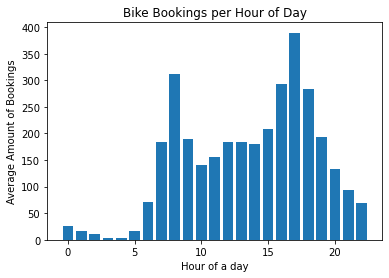

In [49]:
#Count bookings per start_time for each hour of a day (0-23)
#Devide by 365 to get a daily average
hour_of_a_day = []
for i in range(0,23):
    hour_of_a_day.append([i, bike['start_time'].loc[(bike['start_time'].dt.hour) == i].count()/365])
hour_of_a_day = pd.DataFrame(hour_of_a_day)

# Plotting
plt.bar(hour_of_a_day[0], hour_of_a_day[1])
plt.title('Bike Bookings per Hour of Day')
plt.xlabel('Hour of a day')
plt.ylabel('Average Amount of Bookings')
plt.show()


### Fleet Usage Variation During a Week

Here we calculate the average amount of bookings (counted with start_time) per day of a week (Monday to Sunday) to show how fleet usage changes during a week. We can observe, that there is higher demand for bikes during the week than on weekends. This aligns quite well wtih the findings of the daily variation of fleet usage - bike demand seems to be heavily driven by work.


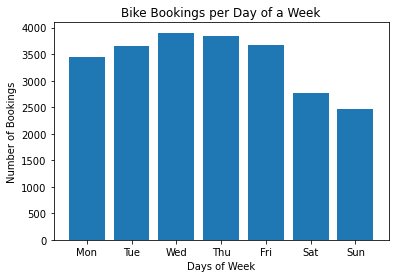

In [50]:
#Count bookings per start_time for each day of a week
#Devide by 52 to get an average value for a week
bike_day_of_a_week = []
for i in range(0,7):
    bike_day_of_a_week.append([i,bike['start_time'].loc[(bike['start_time'].dt.dayofweek) == i].count()/52])
bike_day_of_a_week = pd.DataFrame(bike_day_of_a_week)

#Plotting
days_of_a_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(days_of_a_week,bike_day_of_a_week[1])
plt.title('Bike Bookings per Day of a Week')
plt.xlabel('Days of Week')
plt.ylabel('Number of Bookings')
plt.show()


### Fleet Usage Variation During a Year

Here we calculate the total amount of bookings (counted with start_time) on a monthly basis to show how fleet usage changes during a year. We can observe, that there is significantly higher demand for bikes in summer months than during winter. This seems all too understandable, as the weather and temperatures in summer tend to invite cycling


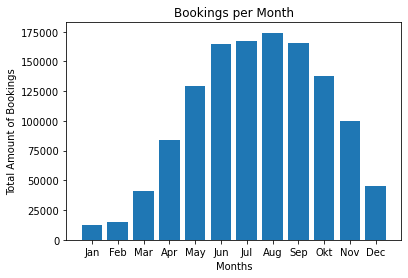

In [51]:
#Count the number of bookings on a monthly basis
bike.index = bike.start_time
bike_month = pd.Series(bike['start_time'].resample('1M').count())

#Plotting
months =['Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Okt' , 'Nov' , 'Dec']
plt.bar(months,bike_month)
plt.title('Bookings per Month')
plt.xlabel('Months')
plt.ylabel('Total Amount of Bookings')
plt.show()